# 5.Splitting data 

Often one has tables that mix regular variables (e.g. the size of cells in microscopy images) with categorical variables (e.g. the type of cell to which they belong). In that case, it is quite usual to split the data using the category to do computations. Pandas allows to do this very easily. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 5.1 Grouping

Let's import some data and have a look at them

In [2]:
composers = pd.read_excel('Datasets/composers.xlsx', sheet_name='Sheet5')

In [3]:
composers.head()

,composer,birth,death,period,country
0,Mahler,1860,1911.0,post-romantic,Austria
1,Beethoven,1770,1827.0,romantic,Germany
2,Puccini,1858,1924.0,post-romantic,Italy
3,Shostakovich,1906,1975.0,modern,Russia
4,Verdi,1813,1901.0,romantic,Italy


In [4]:
# MZ
# you don't have to explicitly go through the table and groupe elements
# simply use the 'groupby' function

### 5.1.1 Single level 
What if we want now to count how many composers we have in each category? In classical computing we would maybe do a for loop to count occurrences. Pandas simplifies this with the ```groupby()``` function, which actually groups elements by a certain criteria, e.g. a categorical variable like the period:

In [5]:
composer_grouped = composers.groupby('period')
composer_grouped
# MZ: create new type of object from Pandas

The output is a bit cryptic. What we actually have is a new object called a group which has a lot of handy properties. First let's see what the groups actually are. As for the Dataframe, let's look at a summary of the object:

In [6]:
composer_grouped.describe()
# MZ: get all the statistics by the groups created

# MZ: for example to see the different levels
composers.country.unique()

array(['Austria', 'Germany', 'Italy', 'Russia', 'Czechia', 'Finland',
       'France', 'RUssia', 'England', 'Belgium', 'Spain', 'USA'],
      dtype=object)

So we have a dataframe with a statistical summary of the the contents. The "names" of the groups are here the indices of the Dataframe. These names are simply all the different categories that were present in the column we used for grouping. Now we can recover a single group:

In [7]:
composer_grouped.get_group('baroque')

,composer,birth,death,period,country
14,Haendel,1685,1759.0,baroque,Germany
16,Purcell,1659,1695.0,baroque,England
17,Charpentier,1643,1704.0,baroque,France
20,Couperin,1626,1661.0,baroque,France
21,Rameau,1683,1764.0,baroque,France
28,Caldara,1670,1736.0,baroque,Italy
29,Pergolesi,1710,1736.0,baroque,Italy
30,Scarlatti,1685,1757.0,baroque,Italy
31,Caccini,1587,1640.0,baroque,Italy
47,Bach,1685,1750.0,baroque,Germany


In [8]:
composer_grouped.get_group('post-romantic')

,composer,birth,death,period,country
0,Mahler,1860,1911.0,post-romantic,Austria
2,Puccini,1858,1924.0,post-romantic,Italy
8,Sibelius,1865,1957.0,post-romantic,Finland
18,Bruckner,1824,1896.0,post-romantic,Austria
49,Strauss,1864,1949.0,post-romantic,Germany


### 5.2.2 Multi-level

If one has multiple categorical variables, one can also do a grouping on several levels. For example here we want to classify composers both by period and country. For this we just give two column names to the ```groupby()``` function:

In [9]:
# MZ: groupping can be done on multiple columns
composer_grouped = composers.groupby(['period','country'])
composer_grouped.describe()

birth                                                   \
                      count         mean        std     min      25%     50%   
period        country                                                          
baroque       England   1.0  1659.000000        NaN  1659.0  1659.00  1659.0   
              France    3.0  1650.666667  29.263174  1626.0  1634.50  1643.0   
              Germany   2.0  1685.000000   0.000000  1685.0  1685.00  1685.0   
              Italy     4.0  1663.000000  53.285395  1587.0  1649.25  1677.5   
classic       Austria   2.0  1744.000000  16.970563  1732.0  1738.00  1744.0   
              Czechia   1.0  1731.000000        NaN  1731.0  1731.00  1731.0   
              Italy     1.0  1749.000000        NaN  1749.0  1749.00  1749.0   
              Spain     1.0  1754.000000        NaN  1754.0  1754.00  1754.0   
modern        Austria   1.0  1885.000000        NaN  1885.0  1885.00  1885.0   
              Czechia   1.0  1854.000000        NaN  1854.0  1854.00  1854.0   
              England   2.0  1936.500000  48.790368  1902.0  1919.25  1936.5   
              France    2.0  1916.500000  12.020815  1908.0  1912.25  1916.5   
              Germany   1.0  1895.000000        NaN  1895.0  1895.00  1895.0   
              RUssia    1.0  1891.000000        NaN  1891.0  1891.00  1891.0   
              Russia    2.0  1894.000000  16.970563  1882.0  1888.00  1894.0   
              USA       3.0  1918.333333  18.502252  1900.0  1909.00  1918.0   
post-romantic Austria   2.0  1842.000000  25.455844  1824.0  1833.00  1842.0   
              Finland   1.0  1865.000000        NaN  1865.0  1865.00  1865.0   
              Germany   1.0  1864.000000        NaN  1864.0  1864.00  1864.0   
              Italy     1.0  1858.000000        NaN  1858.0  1858.00  1858.0   
renaissance   Belgium   2.0  1464.500000  95.459415  1397.0  1430.75  1464.5   
              England   2.0  1551.500000  16.263456  1540.0  1545.75  1551.5   
              Italy     3.0  1552.666667  23.965253  1525.0  1545.50  1566.0   
romantic      Czechia   2.0  1832.500000  12.020815  1824.0  1828.25  1832.5   
              France    3.0  1821.000000  19.672316  1803.0  1810.50  1818.0   
              Germany   4.0  1806.500000  26.388129  1770.0  1800.00  1811.5   
              Italy     4.0  1817.250000  28.004464  1797.0  1800.00  1807.0   
              Russia    2.0  1836.000000   4.242641  1833.0  1834.50  1836.0   
              Spain     2.0  1863.500000   4.949747  1860.0  1861.75  1863.5   

                                       death                                  \
                           75%     max count         mean        std     min   
period        country                                                          
baroque       England  1659.00  1659.0   1.0  1695.000000        NaN  1695.0   
              France   1663.00  1683.0   3.0  1709.666667  51.733290  1661.0   
              Germany  1685.00  1685.0   2.0  1754.500000   6.363961  1750.0   
              Italy    1691.25  1710.0   4.0  1717.250000  52.442826  1640.0   
classic       Austria  1750.00  1756.0   2.0  1800.000000  12.727922  1791.0   
              Czechia  1731.00  1731.0   1.0  1799.000000        NaN  1799.0   
              Italy    1749.00  1749.0   1.0  1801.000000        NaN  1801.0   
              Spain    1754.00  1754.0   1.0  1806.000000        NaN  1806.0   
modern        Austria  1885.00  1885.0   1.0  1935.000000        NaN  1935.0   
              Czechia  1854.00  1854.0   1.0  1928.000000        NaN  1928.0   
              England  1953.75  1971.0   1.0  1983.000000        NaN  1983.0   
              France   1920.75  1925.0   2.0  2004.000000  16.970563  1992.0   
              Germany  1895.00  1895.0   1.0  1982.000000        NaN  1982.0   
              RUssia   1891.00  1891.0   1.0  1953.000000        NaN  1953.0   
              Russia   1900.00  1906.0   2.0  1973.000000   2.828427  1971.0   
              USA    

In [10]:
composer_grouped.get_group(('baroque','Germany'))

,composer,birth,death,period,country
14,Haendel,1685,1759.0,baroque,Germany
47,Bach,1685,1750.0,baroque,Germany


## 5.2 Operations on groups

The main advantage of this Group object is that it allows us to do very quickly both computations and plotting without having to loop through different categories. Indeed Pandas makes all the work for us: it applies functions on each group and then reassembles the results into a Dataframe (or Series depending on output).

For example we can apply most functions we used for Dataframes (mean, sum etc.) on groups as well and Pandas seamlessly does the work for us:

In [11]:
composer_grouped.mean()
# MZ: often you can directly apply the functions on the Pandas object

birth        death
period        country                          
baroque       England  1659.000000  1695.000000
              France   1650.666667  1709.666667
              Germany  1685.000000  1754.500000
              Italy    1663.000000  1717.250000
classic       Austria  1744.000000  1800.000000
              Czechia  1731.000000  1799.000000
              Italy    1749.000000  1801.000000
              Spain    1754.000000  1806.000000
modern        Austria  1885.000000  1935.000000
              Czechia  1854.000000  1928.000000
              England  1936.500000  1983.000000
              France   1916.500000  2004.000000
              Germany  1895.000000  1982.000000
              RUssia   1891.000000  1953.000000
              Russia   1894.000000  1973.000000
              USA      1918.333333  1990.000000
post-romantic Austria  1842.000000  1903.500000
              Finland  1865.000000  1957.000000
              Germany  1864.000000  1949.000000
              Italy    1858.000000  1924.000000
renaissance   Belgium  1464.500000  1534.000000
              England  1551.500000  1624.500000
              Italy    1552.666667  1616.666667
romantic      Czechia  1832.500000  1894.000000
              France   1821.000000  1891.333333
              Germany  1806.500000  1865.750000
              Italy    1817.250000  1875.750000
              Russia   1836.000000  1884.000000
              Spain    1863.500000  1912.500000

In [12]:
composer_grouped.count()

composer  birth  death
period        country                        
baroque       England         1      1      1
              France          3      3      3
              Germany         2      2      2
              Italy           4      4      4
classic       Austria         2      2      2
              Czechia         1      1      1
              Italy           1      1      1
              Spain           1      1      1
modern        Austria         1      1      1
              Czechia         1      1      1
              England         2      2      1
              France          2      2      2
              Germany         1      1      1
              RUssia          1      1      1
              Russia          2      2      2
              USA             3      3      2
post-romantic Austria         2      2      2
              Finland         1      1      1
              Germany         1      1      1
              Italy           1      1      1
renaissance   Belgium         2      2      2
              England         2      2      2
              Italy           3      3      3
romantic      Czechia         2      2      2
              France          3      3      3
              Germany         4      4      4
              Italy           4      4      4
              Russia          2      2      2
              Spain           2      2      2

We can also design specific functions (again, like in the case of Dataframes) and apply them on groups:

In [13]:
def mult(ser):
    return ser.max() * 3

In [14]:
composer_grouped.apply(mult)
# MZ: most functions can be applied irrespectively of the object (DataFrame, group, Series, etc.)

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


composer  birth   death  \
period        country                                                     
baroque       England              PurcellPurcellPurcell   4977  5085.0   
              France                  RameauRameauRameau   5049  5292.0   
              Germany              HaendelHaendelHaendel   5055  5277.0   
              Italy          ScarlattiScarlattiScarlatti   5130  5271.0   
classic       Austria                 MozartMozartMozart   5268  5427.0   
              Czechia                    DusekDusekDusek   5193  5397.0   
              Italy             CimarosaCimarosaCimarosa   5247  5403.0   
              Spain                      SolerSolerSoler   5262  5418.0   
modern        Austria                       BergBergBerg   5655  5805.0   
              Czechia              JanacekJanacekJanacek   5562  5784.0   
              England                 WaltonWaltonWalton   5913  5949.0   
              France            MessiaenMessiaenMessiaen   5775  6048.0   
              Germany                       OrffOrffOrff   5685  5946.0   
              RUssia         ProkofievProkofievProkofiev   5673  5859.0   
              Russia      StravinskyStravinskyStravinsky   5718  5925.0   
              USA                        GlassGlassGlass   5811  5970.0   
post-romantic Austria                 MahlerMahlerMahler   5580  5733.0   
              Finland           SibeliusSibeliusSibelius   5595  5871.0   
              Germany              StraussStraussStrauss   5592  5847.0   
              Italy                PucciniPucciniPuccini   5574  5772.0   
renaissance   Belgium                 LassusLassusLassus   4596  4782.0   
              England              DowlandDowlandDowland   4689  4878.0   
              Italy       PalestrinaPalestrinaPalestrina   4701  4929.0   
romantic      Czechia              SmetanaSmetanaSmetana   5523  5712.0   
              France            MassenetMassenetMassenet   5526  5736.0   
              Germany                 WagnerWagnerWagner   5499  5691.0   
              Italy                      VerdiVerdiVerdi   5574  5757.0   
              Russia   MussorsgskyMussorsgskyMussorsgsky   5517  5661.0   
              Spain             GranadosGranadosGranados   5601  5748.0   

                                                        period  \
period        country                                            
baroque       England                    baroquebaroquebaroque   
              France                     baroquebaroquebaroque   
              Germany                    baroquebaroquebaroque   
              Italy                      baroquebaroquebaroque   
classic       Austria                    classicclassicclassic   
              Czechia                    classicclassicclassic   
              Italy                      classicclassicclassic   
              Spain                      classicclassicclassic   
modern        Austria                       modernmodernmodern   
              Czechia                       modernmodernmodern   
              England                       modernmodernmodern   
              France                        modernmodernmodern   
              Germany                       modernmodernmodern   
              RUssia                        modernmodernmodern   
              Russia                        modernmodernmodern   
              USA                           modernmodernmodern   
post-romantic Austria  post-romanticpost-romanticpost-romantic   
              Finland  post-romanticpost-romanticpost-romantic   
              Germany  post-romanticpost-romanticpost-romantic   
              Italy    post-romanticpost-romanticpost-romantic   
renaissance   Belgium        renaissancerenaissancerenaissance   
              England        renaissancerenaissancerenaissance   
              Italy          renaissancerenaissancerenaissance   
romantic      Czechia                 romanticromanticromantic   
      

## 5.3 Unstacking

Let's have a look again at one of our grouped Dataframe on which we applied some summary function like a mean on the age column:

In [15]:
composers['age']= composers['death']-composers['birth']

In [16]:
composers.groupby(['country','period']).age.mean()

country  period       
Austria  classic          56.000000
         modern           50.000000
         post-romantic    61.500000
Belgium  renaissance      69.500000
Czechia  classic          68.000000
         modern           74.000000
         romantic         61.500000
England  baroque          36.000000
         modern           81.000000
         renaissance      73.000000
Finland  post-romantic    92.000000
France   baroque          59.000000
         modern           87.500000
         romantic         70.333333
Germany  baroque          69.500000
         modern           87.000000
         post-romantic    85.000000
         romantic         59.250000
Italy    baroque          54.250000
         classic          52.000000
         post-romantic    66.000000
         renaissance      64.000000
         romantic         58.500000
RUssia   modern           62.000000
Russia   modern           79.000000
         romantic         48.000000
Spain    classic          52.000000
     

Here we have two level of indices, with the main one being the country which contains all periods. Often for plotting we however need to have the information in another format. In particular we would like each of these values to be one observation in a regular table. For example we could have a country vs period table where all elements are the mean age. To do that we need to **unstack** our multi-level Dataframe:

In [17]:
# MZ: to obtain regular 2dim object
composer_unstacked = composers.groupby(['country','period']).age.mean().unstack()

In [18]:
composer_unstacked

period,baroque,classic,modern,post-romantic,renaissance,romantic
country,,,,,,
Austria,NaN,56.0,50.0,61.5,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,69.5,NaN
Czechia,NaN,68.0,74.0,NaN,NaN,61.500000
England,36.00,NaN,81.0,NaN,73.0,NaN
Finland,NaN,NaN,NaN,92.0,NaN,NaN
France,59.00,NaN,87.5,NaN,NaN,70.333333
Germany,69.50,NaN,87.0,85.0,NaN,59.250000
Italy,54.25,52.0,NaN,66.0,64.0,58.500000
RUssia,NaN,NaN,62.0,NaN,NaN,NaN


## 5.4 Plotting groups

The possibility to create groups gives us also the opportunity to easily create interesting plots without writing too much code. For example we can caluclate the average age of composers in each period and plot it as a bar plot:

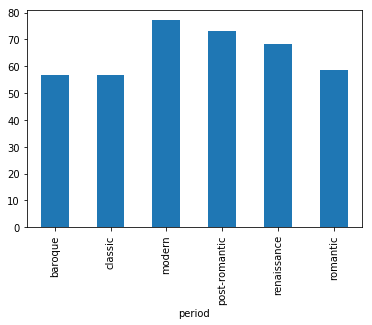

In [19]:
composers.groupby('period')['age'].mean().plot(kind = 'bar')
# MZ: group by period and plot the mean of the ages

We can also use our unstacked table of country vs. period to automatically plot all average ages split by country and period:

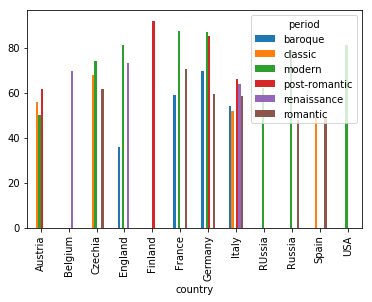

In [20]:
composer_unstacked.plot(kind = 'bar');
# average age for each country and each period

There are much more powerful ways of using grouping-like features for plotting using the ggplot type grammar of graphics where objects can be grouped within an "aeasthetic". In the example above the "colour aesthetic" would e.g. be assigned to the period variable. Such an approach removes the need to do explicit groupings as done here.